In [1]:
from pyspark.shell import spark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('kmean').getOrCreate()

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 3.4.1
      /_/

Using Python version 3.9.13 (main, Aug 25 2022 23:51:50)
Spark context Web UI available at http://DLL-037:4041
Spark context available as 'sc' (master = local[*], app id = local-1695708332833).
SparkSession available as 'spark'.


In [2]:
df=spark.read.csv(r"D:\21bad014_ML\Wholesale customers data.csv",header=True,inferSchema=True)
df

DataFrame[Channel: int, Region: int, Fresh: int, Milk: int, Grocery: int, Frozen: int, Detergents_Paper: int, Delicassen: int]

In [3]:
df.printSchema()

root
 |-- Channel: integer (nullable = true)
 |-- Region: integer (nullable = true)
 |-- Fresh: integer (nullable = true)
 |-- Milk: integer (nullable = true)
 |-- Grocery: integer (nullable = true)
 |-- Frozen: integer (nullable = true)
 |-- Detergents_Paper: integer (nullable = true)
 |-- Delicassen: integer (nullable = true)



In [4]:
df.show()

+-------+------+-----+-----+-------+------+----------------+----------+
|Channel|Region|Fresh| Milk|Grocery|Frozen|Detergents_Paper|Delicassen|
+-------+------+-----+-----+-------+------+----------------+----------+
|      2|     3|12669| 9656|   7561|   214|            2674|      1338|
|      2|     3| 7057| 9810|   9568|  1762|            3293|      1776|
|      2|     3| 6353| 8808|   7684|  2405|            3516|      7844|
|      1|     3|13265| 1196|   4221|  6404|             507|      1788|
|      2|     3|22615| 5410|   7198|  3915|            1777|      5185|
|      2|     3| 9413| 8259|   5126|   666|            1795|      1451|
|      2|     3|12126| 3199|   6975|   480|            3140|       545|
|      2|     3| 7579| 4956|   9426|  1669|            3321|      2566|
|      1|     3| 5963| 3648|   6192|   425|            1716|       750|
|      2|     3| 6006|11093|  18881|  1159|            7425|      2098|
|      2|     3| 3366| 5403|  12974|  4400|            5977|    

In [5]:
from pyspark.ml.feature import VectorAssembler
assembler=VectorAssembler(inputCols=df.columns,outputCol='features')
new_df=assembler.transform(df)
new_df.show()

+-------+------+-----+-----+-------+------+----------------+----------+--------------------+
|Channel|Region|Fresh| Milk|Grocery|Frozen|Detergents_Paper|Delicassen|            features|
+-------+------+-----+-----+-------+------+----------------+----------+--------------------+
|      2|     3|12669| 9656|   7561|   214|            2674|      1338|[2.0,3.0,12669.0,...|
|      2|     3| 7057| 9810|   9568|  1762|            3293|      1776|[2.0,3.0,7057.0,9...|
|      2|     3| 6353| 8808|   7684|  2405|            3516|      7844|[2.0,3.0,6353.0,8...|
|      1|     3|13265| 1196|   4221|  6404|             507|      1788|[1.0,3.0,13265.0,...|
|      2|     3|22615| 5410|   7198|  3915|            1777|      5185|[2.0,3.0,22615.0,...|
|      2|     3| 9413| 8259|   5126|   666|            1795|      1451|[2.0,3.0,9413.0,8...|
|      2|     3|12126| 3199|   6975|   480|            3140|       545|[2.0,3.0,12126.0,...|
|      2|     3| 7579| 4956|   9426|  1669|            3321|      2566

In [6]:
new_df.select('features').show()

+--------------------+
|            features|
+--------------------+
|[2.0,3.0,12669.0,...|
|[2.0,3.0,7057.0,9...|
|[2.0,3.0,6353.0,8...|
|[1.0,3.0,13265.0,...|
|[2.0,3.0,22615.0,...|
|[2.0,3.0,9413.0,8...|
|[2.0,3.0,12126.0,...|
|[2.0,3.0,7579.0,4...|
|[1.0,3.0,5963.0,3...|
|[2.0,3.0,6006.0,1...|
|[2.0,3.0,3366.0,5...|
|[2.0,3.0,13146.0,...|
|[2.0,3.0,31714.0,...|
|[2.0,3.0,21217.0,...|
|[2.0,3.0,24653.0,...|
|[1.0,3.0,10253.0,...|
|[2.0,3.0,1020.0,8...|
|[1.0,3.0,5876.0,6...|
|[2.0,3.0,18601.0,...|
|[1.0,3.0,7780.0,2...|
+--------------------+
only showing top 20 rows



In [7]:
from pyspark.ml.feature import StandardScaler
sc = StandardScaler(inputCol="features",
                        outputCol="scaled_val",
                        withStd=True,
                        withMean=False)
scalerModel=sc.fit(new_df)
new_df= scalerModel.transform(new_df)

In [8]:
new_df.select('scaled_val').show(1)

+--------------------+
|          scaled_val|
+--------------------+
|[4.27303342284647...|
+--------------------+
only showing top 1 row



In [9]:
df1=new_df.select('scaled_val')
df1.show()

+--------------------+
|          scaled_val|
+--------------------+
|[4.27303342284647...|
|[4.27303342284647...|
|[4.27303342284647...|
|[2.13651671142323...|
|[4.27303342284647...|
|[4.27303342284647...|
|[4.27303342284647...|
|[4.27303342284647...|
|[2.13651671142323...|
|[4.27303342284647...|
|[4.27303342284647...|
|[4.27303342284647...|
|[4.27303342284647...|
|[4.27303342284647...|
|[4.27303342284647...|
|[2.13651671142323...|
|[4.27303342284647...|
|[2.13651671142323...|
|[4.27303342284647...|
|[2.13651671142323...|
+--------------------+
only showing top 20 rows



In [19]:
from pyspark.ml.clustering import KMeans

from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction',
                                featuresCol='scaled_val',metricName='silhouette',distanceMeasure='squaredEuclidean')
for i in range(2,10):
    kmeans=KMeans(featuresCol='scaled_val',k=i)
    model=kmeans.fit(new_df)
    predictions=model.transform(new_df)
    score=evaluator.evaluate(predictions)
    silhouette_score.append(score)
    print('Silhouette Score for k =',i,'is',score)

Silhouette Score for k = 2 is 0.4924991771447251
Silhouette Score for k = 3 is 0.4165484722060416
Silhouette Score for k = 4 is 0.43906414357142565
Silhouette Score for k = 5 is 0.5013882342104297
Silhouette Score for k = 6 is 0.4738911862932447
Silhouette Score for k = 7 is 0.4763853140185235
Silhouette Score for k = 8 is 0.4485426750900656
Silhouette Score for k = 9 is 0.4978208618304572


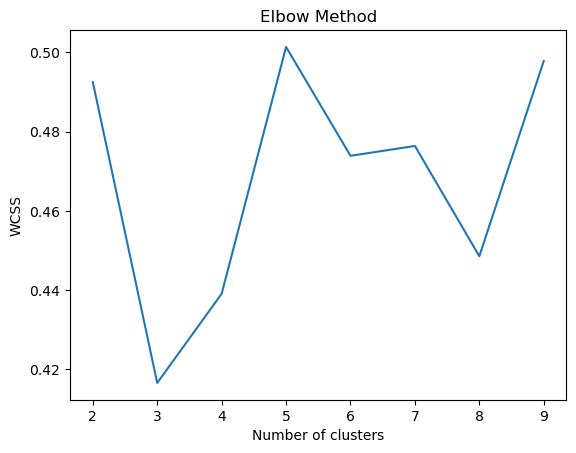

In [20]:
import matplotlib.pyplot as plt
plt.plot(range(2, 10), silhouette_score)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
import matplotlib.pyplot as plt
cluster_centers = model.clusterCenters()

In [22]:
print(cluster_centers)

[array([2.13651671, 3.87460513, 0.66139918, 0.39929548, 0.36356381,
       0.43888311, 0.16630045, 0.34866576]), array([4.27303342, 1.79691832, 0.32916041, 1.39515669, 1.88896836,
       0.28116341, 1.73156913, 0.5039897 ]), array([4.27303342, 3.77633615, 0.70892526, 1.01503591, 1.2302037 ,
       0.28061038, 1.00870274, 0.50309936]), array([4.27303342, 3.2288376 , 0.97577917, 3.46709923, 8.42235385,
       0.11916353, 8.27720318, 0.73738365]), array([4.27303342, 3.51584539, 0.63875148, 2.74769155, 2.94330664,
       0.43385457, 2.88338407, 1.24122603]), array([2.18799904, 1.69611228, 0.81121277, 0.42927247, 0.42022027,
       0.65023173, 0.1678131 , 0.38492957]), array([4.27303342, 3.87460513, 2.72344727, 7.50304924, 5.16610461,
       0.82552757, 4.95974313, 1.10929639]), array([ 2.13651671,  3.2288376 ,  2.75014593,  4.11455936,  1.77814485,
       10.03187994,  0.15845702,  9.49467878]), array([2.21713998, 3.63091927, 2.6750596 , 0.60079764, 0.53095332,
       1.69066814, 0.1592029